### 서울시 서대문구에서 치킨집이 가장 많은 동은 어디인지?

### 자료 출처
- 데이터 다운로드 : LOCALDATA 웹 사이트 
- http://www.localdata.kr/
- 지방자치단체에서 인/허가한 업종별 데이터 제공
- 문화, 체육, 관광, 식품 등 11가지 분야에 걸쳐 다양한 데이터 검색 가능
- 회원 가입 절차를 별도로 거치지 않고도 공공데이터 다운로드 할 수 있음


In [3]:
# !pip install --user --upgrade pandas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [7]:
# data = pd.read_csv('./data/data/서울특별시_일반음식점.csv') # encoding 에러 발생

#### UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb9 in position 1: invalid start byte
     > 한글 encoding 방식이 utf-8이 아님
- 한글처리 방식을 (cp949) 방식을 사용함 : 윈도우 os에서 사용 한글처리방식
- DtypeWarning: Columns (22,27,39,41,44,45) have mixed types. Specify dtype option on import or set low_memory=False.
    - 이런 워닝 메세지가 나올때, low_memory=False 를 설정해주라는 의미

In [8]:
data = pd.read_csv('./data/data/서울특별시_일반음식점.csv',
                  encoding='cp949',
                  low_memory=False)

In [9]:
pd.set_option('display.max_columns',None)
data.head()
data.tail()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
0,1,일반음식점,07_24_04_P,3150000,3150000-101-2020-00448,20200803,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,35.19,157210.0,서울특별시 강서구 마곡동 757 두산더랜드파크 B동 207호,"서울특별시 강서구 마곡중앙로 161-8, 두산더랜드파크 B동 2층 207호 (마곡동)",7788.0,혼밥대왕 마곡점,20200902104120,U,2020-09-04 02:40:00.0,한식,NaN,NaN,한식,NaN,NaN,NaN,NaN,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,35.19,NaN,NaN,NaN,NaN
1,2,일반음식점,07_24_04_P,3150000,3150000-101-2020-00449,20200803,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,0264089282,50.37,157900.0,서울특별시 강서구 화곡동 827-2 1층,"서울특별시 강서구 등촌로13다길 35, 1층 (화곡동)",7740.0,꾸어가게생선구이화곡점,20200914192651,U,2020-09-16 02:40:00.0,한식,187499.286366,448069.583477829,한식,NaN,NaN,NaN,NaN,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,50.37,NaN,NaN,NaN,NaN
2,3,일반음식점,07_24_04_P,3220000,3220000-101-2020-00851,20200803,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,13.65,135918.0,서울특별시 강남구 역삼동 707-34 한신인터밸리24빌딩,"서울특별시 강남구 테헤란로 322, 한신인터밸리24빌딩 지하2층 B130호 (역삼동)",6211.0,인생갈비탕,20210802130824,U,2021-08-04 02:40:00.0,한식,204044.789949,444529.84042741,한식,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,13.65,NaN,NaN,NaN,NaN
3,4,일반음식점,07_24_04_P,3220000,3220000-101-2020-00853,20200803,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,123.30,135840.0,서울특별시 강남구 대치동 896-28,"서울특별시 강남구 테헤란로68길 25, 지하1층 지하1호 (대치동)",6197.0,놀부 공유주방 선릉역,20200803133943,I,2020-08-05 00:23:26.0,한식,204603.136055,444606.621960676,한식,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,123.30,NaN,NaN,NaN,NaN
4,5,일반음식점,07_24_04_P,3220000,3220000-101-2020-00855,20200803,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,053 255 7949,8.26,135730.0,서울특별시 강남구 삼성동 159-7 현대백화점,"서울특별시 강남구 테헤란로 517, 현대백화점 지하1층 (삼성동)",6164.0,온기정,20200803150446,I,2020-08-05 00:23:26.0,일식,205210.358779,445154.42225208,일식,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,8.26,NaN,NaN,NaN,NaN


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
472910,472911,일반음식점,07_24_04_P,3220000,3220000-101-2021-00112,20210202,NaN,3,폐업,2,폐업,20211206.0,NaN,NaN,NaN,NaN,18.00,135930.0,서울특별시 강남구 역삼동 799-18,"서울특별시 강남구 논현로63길 25, 지하1층 1호 (역삼동)",6256.0,샐러드랩 샐랩 춘하추동프로젝트,20211206143207,U,2021-12-08 02:40:00.0,한식,203372.840591,443340.286878555,한식,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,18.00,NaN,NaN,NaN,NaN
472911,472912,일반음식점,07_24_04_P,3220000,3220000-101-2021-00113,20210202,NaN,3,폐업,2,폐업,20211207.0,NaN,NaN,NaN,NaN,13.86,135914.0,서울특별시 강남구 역삼동 668-9 해석빌딩,"서울특별시 강남구 봉은사로30길 64, 해석빌딩 지하1층 주방5호 (역삼동, 해석빌딩)",6140.0,노지푸드,20211207133755,U,2021-12-09 02:40:00.0,한식,203160.756298,444575.215434864,한식,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,13.86,NaN,NaN,NaN,NaN
472912,472913,일반음식점,07_24_04_P,3220000,3220000-101-2021-00114,20210202,NaN,3,폐업,2,폐업,20210729.0,NaN,NaN,NaN,02 20570799,14.15,135820.0,서울특별시 강남구 논현동 108 논현웰스톤,"서울특별시 강남구 학동로43길 38, 지하2층 201호 주방22호 (논현동, 논현웰스톤)",6059.0,포베이키친밸리논현2호점 주방22호,20210729141414,U,2021-07-31 02:40:00.0,기타,203292.307005,446247.511537864,기타,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,14.15,NaN,NaN,NaN,NaN
472913,472914,일반음식점,07_24_04_P,3150000,3150000-101-2021-00072,20210203,NaN,3,폐업,2,폐업,20211102.0,NaN,NaN,NaN,NaN,75.60,157210.0,서울특별시 강서구 마곡동 798-6 류마타워Ⅱ 3층 310호,"서울특별시 강서구 마곡중앙로 59-17, 류마타워Ⅱ 3층 310호 (마곡동)",7807.0,개성진 만두,20211102160419,U,2021-11-04 02:40:00.0,한식,NaN,NaN,한식,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,75.60,NaN,NaN,NaN,NaN
472914,472915,일반음식점,07_24_04_P,3130000,3130000-101-2020-01013,20201208,NaN,3,폐업,2,폐업,20210803.0,NaN,NaN,NaN,NaN,22.75,121825.0,서울특별시 마포구 망원동 435-34,"서울특별시 마포구 방울내로 69, 1층 (망원동)",3961.0,동행포차,20210803103513,U,2021-08-05 02:40:00.0,기타,191354.770087,450883.425724068,기타,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,22.75,NaN,NaN,NaN,NaN


In [10]:
# 데이터 개요 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472915 entries, 0 to 472914
Data columns (total 48 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   번호           472915 non-null  int64  
 1   개방서비스명       472915 non-null  object 
 2   개방서비스아이디     472915 non-null  object 
 3   개방자치단체코드     472915 non-null  int64  
 4   관리번호         472915 non-null  object 
 5   인허가일자        472915 non-null  int64  
 6   인허가취소일자      0 non-null       float64
 7   영업상태구분코드     472915 non-null  int64  
 8   영업상태명        472915 non-null  object 
 9   상세영업상태코드     472915 non-null  int64  
 10  상세영업상태명      472915 non-null  object 
 11  폐업일자         348707 non-null  float64
 12  휴업시작일자       0 non-null       float64
 13  휴업종료일자       0 non-null       float64
 14  재개업일자        0 non-null       float64
 15  소재지전화        327325 non-null  object 
 16  소재지면적        439015 non-null  object 
 17  소재지우편번호      472670 non-null  float64
 18  소재지전체주소      472678 non-

- 어떤 음식을 취급하는지? 업태와 관련(위생업태명, 업태구분 컬럼 활용)
- 현재 영업중인지? (영업상태 컬럼)
- 주소는? (도로명전체주소/소재지전체주소 컬럼)

In [11]:
# 어떤 음식을 취급하는지? 업태와 관련(위생업태명, 업태구분 컬럼 활용)
# 현재 영업중인지? (영업상태 컬럼)

data.위생업태명 # 가장 상세한 구분
data.업태구분명 # 위생업태명 상위 구분
# 위생업태명 활용하기로 결정

# 현재 data의 위생업태 종류 확인 - 중복 제거 후 한번씩만 표현
# 파이썬 자료구조 중 set:집합자료구조는 중복을 허가하지 않음
# 보통 중복제거 후 data 확인할 때 많이 사용됨

set(data.위생업태명.values)
# 치킨집에 해당하는 data만 필요하므로 치킨 / 통닭 두 단어중 하나를 포함한 위생업태명


0         한식
1         한식
2         한식
3         한식
4         일식
          ..
472910    한식
472911    한식
472912    기타
472913    한식
472914    기타
Name: 위생업태명, Length: 472915, dtype: object

0         한식
1         한식
2         한식
3         한식
4         일식
          ..
472910    한식
472911    한식
472912    기타
472913    한식
472914    기타
Name: 업태구분명, Length: 472915, dtype: object

{nan,
 '간이주점',
 '감성주점',
 '경양식',
 '기타',
 '기타 휴게음식점',
 '김밥(도시락)',
 '까페',
 '냉면집',
 '다방',
 '라이브카페',
 '룸살롱',
 '복어취급',
 '분식',
 '뷔페식',
 '식육(숯불구이)',
 '식품등 수입판매업',
 '식품소분업',
 '외국음식전문점(인도,태국등)',
 '이동조리',
 '일반조리판매',
 '일식',
 '전통찻집',
 '정종/대포집/소주방',
 '제과점영업',
 '중국식',
 '출장조리',
 '커피숍',
 '키즈카페',
 '탕류(보신용)',
 '통닭(치킨)',
 '패밀리레스트랑',
 '패스트푸드',
 '한식',
 '호프/통닭',
 '횟집'}

In [12]:
# 문자열에 특정 단어가 포함되어 있는지 확인
# 문자열.contains(문자열1) : 문자열안에 문자열1이 포함되어 있는지의 여부 
# 확인할 문자열집단에 nan이 있으면 에러가 발생하므로 na=False 파라미터를 설정해야 함
# 문자열에 적용되는 함수이므로 형변환 후 사용하는게 일반적임
data.위생업태명.str.contains('통닭|치킨', na=False) # | 는 or 라는 의미

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Name: 위생업태명, Length: 472915, dtype: bool

In [13]:
# 위생업태명 안에 통닭/치킨이 포함된 문자열 반환
set(data.위생업태명[data.위생업태명.str.contains('통닭|치킨', na=False)])
# 위생업태가 '통닭(치킨)', '호프/통닭' 에 해당되는 업장 data가 필요

{'통닭(치킨)', '호프/통닭'}

In [14]:
# 현재 영업중인 업장
# 영업상태 종류 확인
set(data.영업상태명)
# '영업/정상', '폐업' 중 영업/정상인 업장 data가 필요

{'영업/정상', '폐업'}

- 영업상태명이 영업/정상 이고 위생업태명이 '통닭(치킨)' 이거나 '호프/통닭'인 업장 data 추출

In [15]:
# 위 조건을 만족하는 조건식 생성
# 시리즈.isin([데이터1, 데이터2,...])시리즈 원소가 집합(list 등)안의 데이터 1개와 일치하면 True를 반환해주는 함수
(data.영업상태명=='영업/정상') & (data.위생업태명.isin(['통닭(치킨)','호프/통닭']))

0         False
1         False
2         False
3         False
4         False
          ...  
472910    False
472911    False
472912    False
472913    False
472914    False
Length: 472915, dtype: bool

In [16]:
data_fin = data[(data.영업상태명=='영업/정상') & (data.위생업태명.isin(['통닭(치킨)','호프/통닭']))]
data_fin.head()
data_fin.tail()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
30,31,일반음식점,07_24_04_P,3110000,3110000-101-1999-06737,19991113,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,02 7438821,60.28,122809.0,서울특별시 은평구 갈현동 400-9번지 (지하1층),"서울특별시 은평구 연서로29길 14-5, 지하1층 (갈현동)",3330.0,청,20161107111637,I,2018-08-31 23:59:59.0,호프/통닭,192757.634849,457444.483537459,호프/통닭,0.0,0.0,기타,자율,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,60.28,NaN,NaN,NaN,NaN
43,44,일반음식점,07_24_04_P,3180000,3180000-101-2001-14282,20010818,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,12.00,150103.0,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,NaN,NaN,비에이치씨 양평현대점,20150209120544,I,2018-08-31 23:59:59.0,호프/통닭,190517.880546,447739.172359225,호프/통닭,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0,N,12.00,NaN,NaN,NaN,NaN
44,45,일반음식점,07_24_04_P,3010000,3010000-101-2001-13779,20010521,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,0222691662,28.60,100272.0,서울특별시 중구 필동2가 32-24번지 1층,"서울특별시 중구 퇴계로42길 12 (필동2가,1층)",4624.0,짝퉁,20041005000000,I,2018-08-31 23:59:59.0,호프/통닭,199627.907508,450994.671349965,호프/통닭,NaN,NaN,기타,기타,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,28.60,NaN,NaN,NaN,NaN
66,67,일반음식점,07_24_04_P,3000000,3000000-101-2002-11870,20020205,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,NaN,110071.0,서울특별시 종로구 당주동 128-17번지 (지상1층),"서울특별시 종로구 새문안로3길 19 (당주동,(지상1층))",3175.0,써브웨이 (광화문점),20150428154211,I,2018-08-31 23:59:59.0,호프/통닭,197503.476882,452192.01326225,호프/통닭,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,41.87,NaN,NaN,NaN,NaN
67,68,일반음식점,07_24_04_P,3210000,3210000-101-2000-15274,20001201,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,02 5753023,19.80,137900.0,서울특별시 서초구 우면동 59번지 105호,NaN,NaN,교촌,20170811122657,I,2018-08-31 23:59:59.0,호프/통닭,202014.977683,441020.098836819,호프/통닭,0.0,0.0,기타,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,19.80,NaN,NaN,NaN,NaN


,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),위생업태명,남성종사자수,여성종사자수,영업장주변구분명,등급구분명,급수시설구분명,총종업원수,본사종업원수,공장사무직종업원수,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지,Unnamed: 47
124130,124131,일반음식점,07_24_04_P,3120000,3120000-101-2021-00031,20210122,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,49.34,120120.0,서울특별시 서대문구 남가좌동 382-9,"서울특별시 서대문구 가재울미래로 15, 더아무르 A동 1층 101호 (남가좌동)",3712.0,BBQ 남가좌점,20210122113424,I,2021-01-24 00:23:04.0,호프/통닭,192616.368927,452012.797296184,호프/통닭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,49.34,NaN,NaN,NaN,NaN
124151,124152,일반음식점,07_24_04_P,3160000,3160000-101-2020-00384,20201208,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,33.00,152894.0,서울특별시 구로구 오류동 47-1 삼익쇼핑,"서울특별시 구로구 경인로 192, 삼익쇼핑 5층 (오류동)",8271.0,치킨대통령,20201208102033,I,2020-12-10 00:23:07.0,호프/통닭,186015.738370,443657.614265375,호프/통닭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,33.00,NaN,NaN,NaN,NaN
124171,124172,일반음식점,07_24_04_P,3200000,3200000-101-2020-00626,20201209,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,62.80,151859.0,서울특별시 관악구 신림동 246-30,"서울특별시 관악구 대학길 37, 지하1층 (신림동)",8814.0,플레이걸,20201209093622,I,2020-12-11 00:23:07.0,호프/통닭,194430.572823,440761.365620824,호프/통닭,NaN,NaN,NaN,NaN,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,62.80,NaN,NaN,NaN,NaN
124193,124194,일반음식점,07_24_04_P,3060000,3060000-101-2021-00028,20210203,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,NaN,53.84,131856.0,서울특별시 중랑구 상봉동 268-36 1층,"서울특별시 중랑구 상봉중앙로1길 84, 1층 (상봉동)",2082.0,지코바 상봉1호점,20210203144320,I,2021-02-05 00:23:13.0,호프/통닭,207682.058820,455301.5632468,호프/통닭,NaN,NaN,NaN,NaN,상수도전용,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,53.84,NaN,NaN,NaN,NaN
124203,124204,일반음식점,07_24_04_P,3080000,3080000-101-2021-00015,20210122,NaN,1,영업/정상,1,영업,NaN,NaN,NaN,NaN,029057778,40.00,142877.0,서울특별시 강북구 수유동 183-4 한영빌딩,"서울특별시 강북구 노해로 88, 한영빌딩 1층 (수유동)",1051.0,청년치킨 수유점,20210407205616,U,2021-04-09 02:40:00.0,호프/통닭,201931.867791,460104.86528988,호프/통닭,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,40.00,NaN,NaN,NaN,NaN


In [17]:
data_fin.info() # 서울시 전체 자치구의 현재 영업중인 치킨집의 수는 13110개

<class 'pandas.core.frame.DataFrame'>
Index: 13110 entries, 30 to 124203
Data columns (total 48 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           13110 non-null  int64  
 1   개방서비스명       13110 non-null  object 
 2   개방서비스아이디     13110 non-null  object 
 3   개방자치단체코드     13110 non-null  int64  
 4   관리번호         13110 non-null  object 
 5   인허가일자        13110 non-null  int64  
 6   인허가취소일자      0 non-null      float64
 7   영업상태구분코드     13110 non-null  int64  
 8   영업상태명        13110 non-null  object 
 9   상세영업상태코드     13110 non-null  int64  
 10  상세영업상태명      13110 non-null  object 
 11  폐업일자         0 non-null      float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        6536 non-null   object 
 16  소재지면적        12677 non-null  object 
 17  소재지우편번호      13103 non-null  float64
 18  소재지전체주소      13103 non-null  object 
 19  도로명전체주소

In [18]:
# 인덱싱의 조건의 유효성 검사 - 필요한 조건만 추출된 결과 확인
set(data_fin.위생업태명)
set(data_fin.영업상태명)

{'통닭(치킨)', '호프/통닭'}

{'영업/정상'}

- data_fin : 현재 영업중인 서울시 전체 자치구의 치킨집 정보

In [19]:
# 서대문구 데이터만 필요 : 서대문구의 각 동에 치킨집이 몇개나 있는지??
# 소재지전체주소, 위생업태명

data_fin = data_fin[['소재지전체주소', '위생업태명']]
data_fin.head() # 현재영업중인 치킨집의 주소, 업태명만 가지고 있는 데이터

,소재지전체주소,위생업태명
30,서울특별시 은평구 갈현동 400-9번지 (지하1층),호프/통닭
43,서울특별시 영등포구 양평동3가 101번지 현대아파트 상가내 1층 102호,호프/통닭
44,서울특별시 중구 필동2가 32-24번지 1층,호프/통닭
66,서울특별시 종로구 당주동 128-17번지 (지상1층),호프/통닭
67,서울특별시 서초구 우면동 59번지 105호,호프/통닭


In [20]:
# 주소 컬럼을 이용해 서대문구 data만 추출
# 주소에 서대문구가 포함된 행만 추출
res = data_fin.소재지전체주소.str.contains('서대문구', na=False)
data_seo = data_fin[res]
data_seo.head()

,소재지전체주소,위생업태명
178,서울특별시 서대문구 창천동 33-25번지,통닭(치킨)
698,서울특별시 서대문구 홍제동 459 현대종합상가,호프/통닭
724,서울특별시 서대문구 남가좌동 347-20번지,호프/통닭
1200,서울특별시 서대문구 연희동 131-1번지 사러가쇼핑,호프/통닭
1405,서울특별시 서대문구 창천동 52-14,호프/통닭


- data_seo : 현재 영업중인 서대문구의 치킨집 data

### 서대문구 각 동의 치킨집 수를 연산
- 동 정보는 주소에 있음 (주소는 정형화 되어 있음)
    - ex. 서울특별시 서대문구 연희동 131-1번지 사러가쇼핑
        - 앞 5글자 : 광역시도
        - 공백
        - 4글자 : 자치구
        - 공백
        - 11글자 skip 하면 동 정보가 나옴
        - 동 데이터로 5글자를 추출(동의 글자수가 일정하지 않기 때문) 후 불필요한 문자는 제거 후 사용(문자열 전처리)
        - 주소 문자열의 11번 인덱스부터 16인덱스 위치까지 추출
<hr>
- 문자열 함수 중 slice(start=시작인덱스, stop=끝인덱스+1)        

In [21]:
addr = data_seo.소재지전체주소.str.slice(start=11,stop=17)
addr

178       창천동 33
698       홍제동 45
724       남가좌동 3
1200      연희동 13
1405      창천동 52
           ...  
122500    남가좌동 3
123490    홍제동 30
123548    홍제동 96
123724    북아현동 1
124130    남가좌동 3
Name: 소재지전체주소, Length: 400, dtype: object

- addr : 서대문구 치킨집의 동 정보 data
    - 동명 이외에 더 많은 문자가 들어와 있으므로 전처리
    - xxx동 xxx번지 형태이므로 추출된 결과는 동이름과 번지의 숫자 일부분이 추출되었음
    - 숫자 제거, 공백 제거

In [22]:
# 숫자 제거 : 정규식 활용
# 정규식 : 일련의 정해진 연산기호를 이용해서 문자열안에서 필요한 문자만 추출하는 연산
# 정규식 사용용도 : 형식문자 검증할 때 주로 사용(이메일, url 주소, 주민등록번호...)
import re # 정규식 패키지

# re.sub(정규식, 대체할 문자, 원래 문자) : replace와 같은 역할
# 원래 문자에서 정규식이 의미하는 문자를 찾아서 대체문자로 변환
# 한개의 원소에 대해서만 작업함
# [0-9]+   => 0~9 사이의 숫자가 1번이상 반복되는 패턴
re.sub(r'[0-9]+','','창천동 35').replace(' ','')

'창천동'

In [23]:
# addr data의 숫자 제거
i = 0
addr_fin = pd.Series() # 빈 시리즈 생성
print(addr_fin)

for string in addr:
    newstring = re.sub(r'[0-9]+','',string).replace(' ','')
    addr_fin[i] = newstring
    print(addr_fin)
    i += 1

Series([], dtype: object)
0    창천동
dtype: object
0    창천동
1    홍제동
dtype: object
0     창천동
1     홍제동
2    남가좌동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
5     연희동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
5     연희동
6     창천동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
5     연희동
6     창천동
7    남가좌동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
5     연희동
6     창천동
7    남가좌동
8    북가좌동
dtype: object
0     창천동
1     홍제동
2    남가좌동
3     연희동
4     창천동
5     연희동
6     창천동
7    남가좌동
8    북가좌동
9    북아현동
dtype: object
0      창천동
1      홍제동
2     남가좌동
3      연희동
4      창천동
5      연희동
6      창천동
7     남가좌동
8     북가좌동
9     북아현동
10     창천동
dtype: object
0      창천동
1      홍제동
2     남가좌동
3      연희동
4      창천동
5      연희동
6      창천동
7     남가좌동
8     북가좌동
9     북아현동
10     창천동
11    창천동-
dtype: object
0     

0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
264     냉천동
265    북가좌동
266    남가좌동
267    충정로가
268    북아현동
Length: 269, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
265    북가좌동
266    남가좌동
267    충정로가
268    북아현동
269    남가좌동
Length: 270, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
266    남가좌동
267    충정로가
268    북아현동
269    남가좌동
270     연희동
Length: 271, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
267    충정로가
268    북아현동
269    남가좌동
270     연희동
271     창천동
Length: 272, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
268    북아현동
269    남가좌동
270     연희동
271     창천동
272     홍은동
Length: 273, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
269    남가좌동
270     연희동
271     창천동
272     홍은동
273    북가좌동
Length: 274, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희

0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
387    북가좌동
388    북가좌동
389     창천동
390    남가좌동
391    남가좌동
Length: 392, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
388    북가좌동
389     창천동
390    남가좌동
391    남가좌동
392     창천동
Length: 393, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
389     창천동
390    남가좌동
391    남가좌동
392     창천동
393     창천동
Length: 394, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
390    남가좌동
391    남가좌동
392     창천동
393     창천동
394    북아현동
Length: 395, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
391    남가좌동
392     창천동
393     창천동
394    북아현동
395    남가좌동
Length: 396, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
392     창천동
393     창천동
394    북아현동
395    남가좌동
396     홍제동
Length: 397, dtype: object
0       창천동
1       홍제동
2      남가좌동
3       연희

In [24]:
# 숫자와 공백이 제거된 동 data
addr_fin # 서대문구의 치킨집의 주소 중 동명만 추출

0       창천동
1       홍제동
2      남가좌동
3       연희동
4       창천동
       ... 
395    남가좌동
396     홍제동
397     홍제동
398    북아현동
399    남가좌동
Length: 400, dtype: object

In [25]:
# 각 동에 치킨집이 몇개나 있는지 확인
addr_fin.value_counts()

창천동     87
홍제동     48
북가좌동    48
남가좌동    47
연희동     40
홍은동     34
충정로가    21
북아현동    20
대현동     15
냉천동     10
홍은동-     9
미근동      6
창천동-     4
옥천동      2
영천동      2
천연동      2
옥천동번     1
대신동      1
합동       1
합동-      1
연희동-     1
Name: count, dtype: int64

In [31]:
addr_fin = addr_fin.str.replace('-','').str.replace('옥천동번', '옥천동')

In [32]:
# 전처리가 종료된 최종 data 이용해서 동별로 개수 세기
ck_cnt = addr_fin.value_counts()

In [33]:
# 서울시 서대문구의 각 동별 치킨집 수(치킨집 분포) 
ck_cnt

창천동     91
홍제동     48
북가좌동    48
남가좌동    47
홍은동     43
연희동     41
충정로가    21
북아현동    20
대현동     15
냉천동     10
미근동      6
옥천동      3
영천동      2
합동       2
천연동      2
대신동      1
Name: count, dtype: int64

### tree map 그래프를 활용한 시각화

- heatmap과 비슷한데 heatmap이 data의 크기를 색상으로 규정하는데 반해
    - treemap은 사각형 내부 조각의 크기를 이용해 data의 크기를 표현
    - heatmap : 동일한 크기의 조각을 색상으로 분류
    - treemap : 서로다른 크기의 조각으로 data 표현
    - python treemap : squarify 패키지(install해서 사용)

In [34]:
# !pip install squarify

### pip 사용시 주의사항
- pip 만으로 설치가 안되는 패키지는 wheel 파일을 다운 받아서 설치해야 함
- 권한문제로 설치가 안되는 경우 : pip install --user 라는 옵션 사용 => pip install --user 패키지명
- 설치되어있는 패키지의 업그레이드 : pip install --user --upgrade 패키지명 == 버전
- 패키지 삭제 : pip uninstall --user 패키지명

In [35]:
import squarify # 트리맵 작도 패키지

#### squarify.plot(데이터, label=표시할 라벨data)

In [39]:
ck_cnt.index
ck_cnt.values

Index(['창천동', '홍제동', '북가좌동', '남가좌동', '홍은동', '연희동', '충정로가', '북아현동', '대현동',
       '냉천동', '미근동', '옥천동', '영천동', '합동', '천연동', '대신동'],
      dtype='object')

array([91, 48, 48, 47, 43, 41, 21, 20, 15, 10,  6,  3,  2,  2,  2,  1],
      dtype=int64)

<Axes: >

<Axes: >

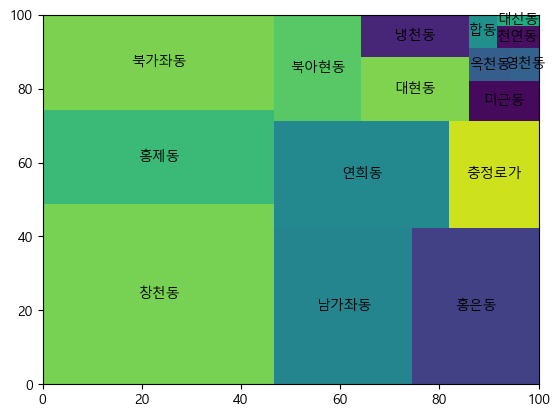

In [47]:
squarify.plot(ck_cnt)
squarify.plot(ck_cnt, label=ck_cnt.index)

### 연습
- 정상영업/폐업 상관없이 현 시점(데이터 파일 기준) 치킨집의 인허가 분포도(25개 자치구별) 트리맵으로 그리기
- 영업상태가 폐업인 업장의 자치구별 분포도 (업종 일반음식점인 업장)
- 강남구의 읍면동별 중국집 분포도(전체인허가/정상영업/폐업 각각에 대해 분포도 시각화)